In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.drop(['Cabin','PassengerId','Ticket'],axis=1,inplace=True)
test.drop(['Cabin','PassengerId','Ticket'],axis=1,inplace=True)

In [5]:
train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
227,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,7.2500,S
567,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
775,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,7.7500,S
129,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,6.9750,S
506,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26.0000,S
397,0,2,"McKane, Mr. Peter David",male,46.0,0,0,26.0000,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0000,S
765,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,77.9583,S
283,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,8.0500,S
152,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,8.0500,S


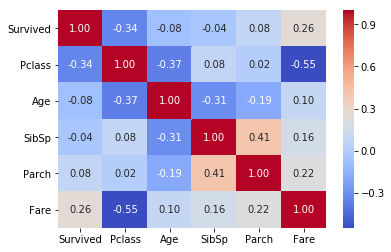

In [6]:
sns.heatmap(train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [9]:
data = [train, test]

In [10]:
train['Age'].fillna(train['Age'].median(),inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
train['Fare'].fillna(train['Fare'].median(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [11]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


In [12]:
train['Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]
test['Title'] = test['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]

In [13]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [14]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
th            1
Capt          1
Mme           1
Lady          1
Ms            1
Sir           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [15]:
train['Title'] = train['Title'].apply(lambda x:x if x in ['Mr','Miss','Mrs','Master'] else 'Other')
test['Title'] = test['Title'].apply(lambda x:x if x in ['Mr','Miss','Mrs','Master'] else 'Other')

In [16]:
train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [17]:
features = test.columns

In [18]:
features

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title'],
      dtype='object')

In [19]:
train.shape

(891, 10)

In [20]:
test.shape

(418, 9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


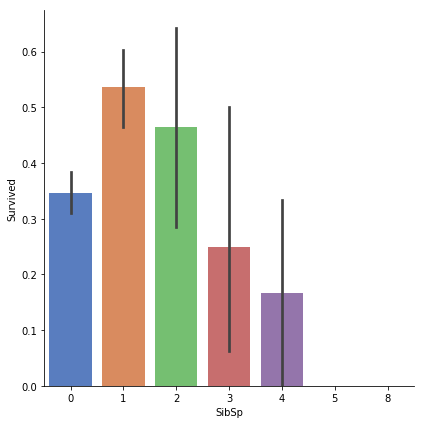

In [21]:
sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 6 , palette = "muted")

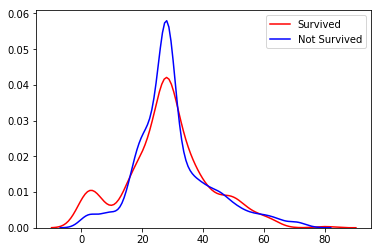

In [22]:
g = sns.kdeplot(train['Age'][train['Survived']==1],color='Red')
g = sns.kdeplot(train['Age'][train['Survived']==0],color='Blue')
g.legend(['Survived','Not Survived'])

In [23]:
train['AgeBin'] = pd.cut(train['Age'].astype(int), 5)
test['AgeBin'] = pd.cut(test['Age'].astype(int), 5)
train['FareBin'] = pd.qcut(train['Fare'].astype(int),5)
test['FareBin'] = pd.qcut(test['Fare'].astype(int),5)

In [24]:
 train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin,FareBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,"(16.0, 32.0]","(-0.001, 7.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,"(32.0, 48.0]","(39.0, 512.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,"(16.0, 32.0]","(-0.001, 7.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,"(32.0, 48.0]","(39.0, 512.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,"(32.0, 48.0]","(7.0, 10.0]"


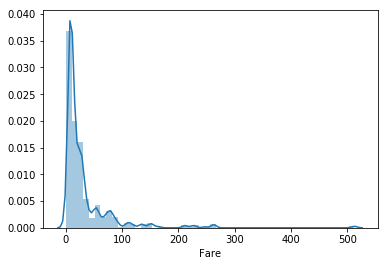

In [25]:
sns.distplot(train['Fare']) ## very skew

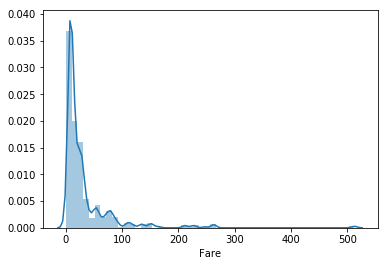

In [26]:
sns.distplot(train['Fare'])

In [27]:
train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x>0 else 0)
test['Fare'] = test['Fare'].map(lambda x:np.log(x) if x>0 else 0)

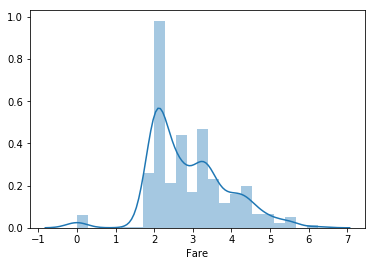

In [28]:
sns.distplot(train['Fare'])

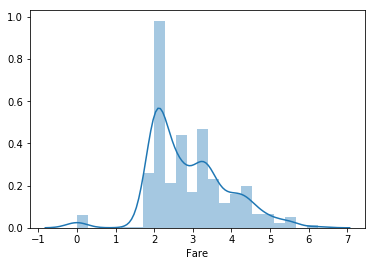

In [29]:
sns.distplot(train['Fare'])

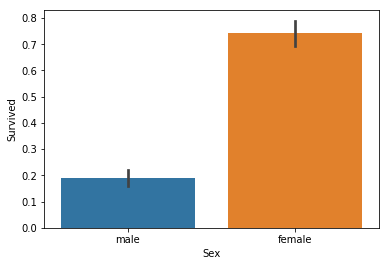

In [30]:
sns.barplot(x='Sex', y='Survived', data=train)

In [31]:
train["Sex"] = train["Sex"].map({"male": 0, "female":1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [32]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin,FareBin
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S,Mr,"(16.0, 32.0]","(-0.001, 7.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C,Mrs,"(32.0, 48.0]","(39.0, 512.0]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S,Miss,"(16.0, 32.0]","(-0.001, 7.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S,Mrs,"(32.0, 48.0]","(39.0, 512.0]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S,Mr,"(32.0, 48.0]","(7.0, 10.0]"


In [33]:
train['FamilySize'] = train['SibSp']+train['Parch']
test['FamilySize'] = test['SibSp']+test['Parch']

In [34]:
train.shape

(891, 13)

In [35]:
test.shape

(418, 12)

In [36]:
train = pd.concat([train,pd.get_dummies(train['AgeBin'])], axis=1)
test  =pd.concat([test,pd.get_dummies(test['AgeBin'])], axis=1)

In [37]:
train = pd.concat([train,pd.get_dummies(train['FareBin'])], axis=1)
test  =pd.concat([test,pd.get_dummies(test['FareBin'])], axis=1)

In [38]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,...,"(-0.08, 16.0]","(16.0, 32.0]","(32.0, 48.0]","(48.0, 64.0]","(64.0, 80.0]","(-0.001, 7.0]","(7.0, 10.0]","(10.0, 21.0]","(21.0, 39.0]","(39.0, 512.0]"
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S,Mr,...,0,1,0,0,0,1,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C,Mrs,...,0,0,1,0,0,0,0,0,0,1


In [39]:
train = pd.concat([train,pd.get_dummies(train['Title'])], axis=1)
test  =pd.concat([test,pd.get_dummies(test['Title'])], axis=1)
train = pd.concat([train,pd.get_dummies(train['Embarked'])], axis=1)
test  =pd.concat([test,pd.get_dummies(test['Embarked'])], axis=1)

In [40]:
train.drop(['Name','Age','Fare','FareBin','AgeBin','Title','Embarked'],axis=1,inplace=True)
test.drop(['Name','Age','Fare','FareBin','AgeBin','Title','Embarked'],axis=1,inplace=True)

In [41]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,FamilySize,"(-0.08, 16.0]","(16.0, 32.0]","(32.0, 48.0]","(48.0, 64.0]",...,"(21.0, 39.0]","(39.0, 512.0]",Master,Miss,Mr,Mrs,Other,C,Q,S
0,0,3,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,1,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,1,3,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,1,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,3,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [42]:
test.head()

,Pclass,Sex,SibSp,Parch,FamilySize,"(-0.076, 15.2]","(15.2, 30.4]","(30.4, 45.6]","(45.6, 60.8]","(60.8, 76.0]",...,"(21.0, 45.6]","(45.6, 512.0]",Master,Miss,Mr,Mrs,Other,C,Q,S
0,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3,1,1,1,2,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [43]:
target = train['Survived']

In [44]:
train.drop(['Survived'],axis=1,inplace=True)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from xgboost import XGBClassifier

In [47]:
xgb = XGBClassifier()

In [48]:
test.isnull().sum()

Pclass            0
Sex               0
SibSp             0
Parch             0
FamilySize        0
(-0.076, 15.2]    0
(15.2, 30.4]      0
(30.4, 45.6]      0
(45.6, 60.8]      0
(60.8, 76.0]      0
(-0.001, 7.0]     0
(7.0, 10.8]       0
(10.8, 21.0]      0
(21.0, 45.6]      0
(45.6, 512.0]     0
Master            0
Miss              0
Mr                0
Mrs               0
Other             0
C                 0
Q                 0
S                 0
dtype: int64

In [49]:
train.shape

(891, 23)

In [50]:
train.columns = [     'Pclass',         'Sex',       'SibSp',       'Parch',
    'FamilySize','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r']

In [51]:
test.columns = [     'Pclass',         'Sex',       'SibSp',       'Parch',
    'FamilySize','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r']

In [52]:
train.head()

,Pclass,Sex,SibSp,Parch,FamilySize,a,b,c,d,e,...,i,j,k,l,m,n,o,p,q,r
0,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,3,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=42)

In [54]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [55]:
xgb.score(X_test,y_test)

0.8340807174887892

In [56]:
xgb.score(X_train,y_train)

0.8577844311377245

In [57]:
pred = xgb.predict(test)

In [58]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
sub = pd.read_csv('lr.csv')

In [60]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [61]:
sub.Survived = pred

In [64]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [65]:
sub.to_csv('submission.csv',index=False)